dataset:

https://www.kaggle.com/datasets/subinium/emojiimage-dataset/data


ref: https://www.kaggle.com/code/electroknight/emoji-encryption

In [1]:
import pandas as pd
import tkinter as tk
from tkinter import *

In [2]:
# %pip install tensorflow

In [3]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import img_to_array
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./archive/full_emoji.csv")

In [5]:
df.head()

,#,emoji,unicode,name,Apple,Google,Facebook,Windows,Twitter,JoyPixels,Samsung,Gmail,SoftBank,DoCoMo,KDDI
0,1,😀,U+1F600,grinning face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAPAKIFAJh3AP/z...",NaN,NaN,NaN
1,2,😃,U+1F603,grinning face with big eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIFAF5LAP/z...","data:image/png;base64,R0lGODlhDwAPAKIAAP///wAA...","data:image/png;base64,R0lGODlhDAAMAIABAMxm////...","data:image/png;base64,R0lGODlhDgAPALMJAP//mf/M..."
2,3,😄,U+1F604,grinning face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAF5LAJh3...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...",NaN,NaN
3,4,😁,U+1F601,beaming face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAIoAAf/v...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...","data:image/png;base64,R0lGODlhDAAMAIABAP+ZAP//...","data:image/png;base64,R0lGODlhDgAPALMIAJmZmf//..."
4,5,😆,U+1F606,grinning squinting face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhEAAMAKIFAF5LAP/z...",NaN,"data:image/png;base64,R0lGODlhDAAMAIABAMxm////...",NaN


In [6]:
df.columns

Index(['#', 'emoji', 'unicode', 'name', 'Apple', 'Google', 'Facebook',
       'Windows', 'Twitter', 'JoyPixels', 'Samsung', 'Gmail', 'SoftBank',
       'DoCoMo', 'KDDI'],
      dtype='object')

In [7]:
# Cambiar el nombre de la primera columna
df = df.rename(columns={'#': 'index'})

#crear otra etiquetaw que combine index y emoji
df['label'] = df.index.astype(str) + " " + df['emoji']

# En el LabelEncoder usamos estas etiquetas combinadas
class_labels = df['label'].values

In [8]:
df.head()

,index,emoji,unicode,name,Apple,Google,Facebook,Windows,Twitter,JoyPixels,Samsung,Gmail,SoftBank,DoCoMo,KDDI,label
0,1,😀,U+1F600,grinning face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAPAKIFAJh3AP/z...",NaN,NaN,NaN,0 😀
1,2,😃,U+1F603,grinning face with big eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIFAF5LAP/z...","data:image/png;base64,R0lGODlhDwAPAKIAAP///wAA...","data:image/png;base64,R0lGODlhDAAMAIABAMxm////...","data:image/png;base64,R0lGODlhDgAPALMJAP//mf/M...",1 😃
2,3,😄,U+1F604,grinning face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAF5LAJh3...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...",NaN,NaN,2 😄
3,4,😁,U+1F601,beaming face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAIoAAf/v...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...","data:image/png;base64,R0lGODlhDAAMAIABAP+ZAP//...","data:image/png;base64,R0lGODlhDgAPALMIAJmZmf//...",3 😁
4,5,😆,U+1F606,grinning squinting face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhEAAMAKIFAF5LAP/z...",NaN,"data:image/png;base64,R0lGODlhDAAMAIABAMxm////...",NaN,4 😆


In [9]:
len_dataset = len(df)
len_dataset

1816

In [10]:
# mantener solo los primeros 119 ya que los demas emojis realmente no nos sirven
df = df.iloc[:119]
len_dataset = len(df)
len_dataset

119

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      119 non-null    int64 
 1   emoji      119 non-null    object
 2   unicode    119 non-null    object
 3   name       119 non-null    object
 4   Apple      119 non-null    object
 5   Google     119 non-null    object
 6   Facebook   117 non-null    object
 7   Windows    117 non-null    object
 8   Twitter    119 non-null    object
 9   JoyPixels  119 non-null    object
 10  Samsung    117 non-null    object
 11  Gmail      67 non-null     object
 12  SoftBank   41 non-null     object
 13  DoCoMo     25 non-null     object
 14  KDDI       55 non-null     object
 15  label      119 non-null    object
dtypes: int64(1), object(15)
memory usage: 15.0+ KB
None


In [12]:
print(df.describe(include='all'))

             index emoji  unicode           name  \
count   119.000000   119      119            119   
unique         NaN   119      119            119   
top            NaN     😀  U+1F600  grinning face   
freq           NaN     1        1              1   
mean     60.000000   NaN      NaN            NaN   
std      34.496377   NaN      NaN            NaN   
min       1.000000   NaN      NaN            NaN   
25%      30.500000   NaN      NaN            NaN   
50%      60.000000   NaN      NaN            NaN   
75%      89.500000   NaN      NaN            NaN   
max     119.000000   NaN      NaN            NaN   

                                                    Apple  \
count                                                 119   
unique                                                119   
top     data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...   
freq                                                    1   
mean                                                  NaN   
std      

In [13]:
# ver valores nulos
print(df.isnull().sum())
# quitar valores nulos
df = df.dropna()

index         0
emoji         0
unicode       0
name          0
Apple         0
Google        0
Facebook      2
Windows       2
Twitter       0
JoyPixels     0
Samsung       2
Gmail        52
SoftBank     78
DoCoMo       94
KDDI         64
label         0
dtype: int64


In [14]:
# ver valores nulos
print(df.isnull().sum())

index        0
emoji        0
unicode      0
name         0
Apple        0
Google       0
Facebook     0
Windows      0
Twitter      0
JoyPixels    0
Samsung      0
Gmail        0
SoftBank     0
DoCoMo       0
KDDI         0
label        0
dtype: int64


In [15]:
image_root = "./archive/image"
folders = [f for f in os.listdir(image_root) if os.path.isdir(os.path.join(image_root, f))]

images = []
labels = []

print(f"\nCarpetas encontradas: {folders}\n")

for folder in folders:
    folder_path = os.path.join(image_root, folder)
    print(f"Procesando carpeta: {folder}")
    for i, row in tqdm(df.iterrows(), total=len(df), desc=f"{folder}"):
        img_path = os.path.join(folder_path, f"{i+1}.png")
        if os.path.exists(img_path):
            try:
                img = Image.open(img_path).convert('RGB').resize((64, 64))
                img_array = img_to_array(img) / 255.0
                images.append(img_array)
                labels.append(row['emoji'])
            except Exception as e:
                print(f"Error con {img_path}: {e}")

X = np.array(images)
y = np.array(labels)

print(f"\nImágenes cargadas: {X.shape}")
print(f"Etiquetas cargadas: {y.shape}")



Carpetas encontradas: ['Apple', 'DoCoMo', 'Facebook', 'Gmail', 'Google', 'JoyPixels', 'KDDI', 'Samsung', 'SoftBank', 'Twitter', 'Windows']

Procesando carpeta: Apple


Apple:   0%|          | 0/20 [00:00<?, ?it/s]c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
Apple: 100%|██████████| 20/20 [00:00<00:00, 65.84it/s]


Procesando carpeta: DoCoMo


DoCoMo: 100%|██████████| 20/20 [00:00<00:00, 118.96it/s]


Procesando carpeta: Facebook


Facebook: 100%|██████████| 20/20 [00:00<00:00, 103.66it/s]


Procesando carpeta: Gmail


Gmail: 100%|██████████| 20/20 [00:00<00:00, 112.71it/s]


Procesando carpeta: Google


Google: 100%|██████████| 20/20 [00:00<00:00, 97.74it/s]


Procesando carpeta: JoyPixels


JoyPixels: 100%|██████████| 20/20 [00:00<00:00, 98.08it/s] 


Procesando carpeta: KDDI


KDDI: 100%|██████████| 20/20 [00:00<00:00, 114.78it/s]


Procesando carpeta: Samsung


Samsung: 100%|██████████| 20/20 [00:00<00:00, 99.55it/s]


Procesando carpeta: SoftBank


SoftBank: 100%|██████████| 20/20 [00:00<00:00, 116.69it/s]


Procesando carpeta: Twitter


Twitter: 100%|██████████| 20/20 [00:00<00:00, 106.01it/s]


Procesando carpeta: Windows


Windows: 100%|██████████| 20/20 [00:00<00:00, 105.79it/s]


Imágenes cargadas: (220, 64, 64, 3)
Etiquetas cargadas: (220,)


In [16]:

# 3. Codificar etiquetas
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)
# y_categorical = to_categorical(y_encoded)
# print(f"Total clases únicas: {len(le.classes_)}")

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)
print(f"Total clases únicas: {len(le.classes_)}")




Total clases únicas: 20


c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,627,732 (6.21 MB)

 Trainable params: 1,627,732 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0571 - loss: 3.1667 - val_accuracy: 0.0556 - val_loss: 2.9903
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2071 - loss: 2.7766 - val_accuracy: 0.1667 - val_loss: 2.9611
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3429 - loss: 2.4389 - val_accuracy: 0.2222 - val_loss: 2.9154
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4357 - loss: 2.1148 - val_accuracy: 0.2222 - val_loss: 2.9431
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5071 - loss: 1.6638 - val_accuracy: 0.2500 - val_loss: 2.7556
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5929 - loss: 1.4532 - val_accuracy: 0.3056 - val_loss: 2.7446
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6714 - loss: 1.2063 - val_accuracy: 0.3056 - val_loss: 2.4568
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6786 - loss: 1.0620 - val_accuracy: 0.3333 - val_loss: 2.6566


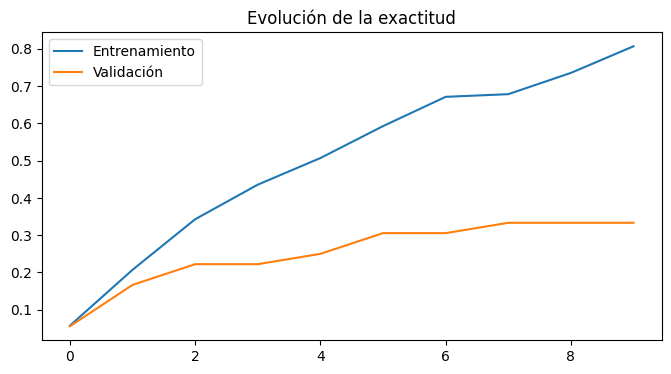

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicción para ./archive/image/Apple/10.png: 😔


c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# 4. Dividir train/test

X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical
)


# 5. Modelo CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y_encoded)), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# 6. Entrenamiento
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

# Predecimos el conjunto de test
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


# 7. Evaluación
loss, acc = model.evaluate(X_test, y_test)
print(f"\nAccuracy del modelo: {acc:.2f}")

# 8. Gráficos
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Evolución de la exactitud')
plt.legend()
plt.show()

# 9. Prueba con una imagen específica
test_img_path = "./archive/image/Apple/10.png"
img = Image.open(test_img_path).convert('RGB').resize((64, 64))
img_array = np.expand_dims(img_to_array(img) / 255.0, axis=0)

prediction = model.predict(img_array)
pred_label = le.inverse_transform([np.argmax(prediction)])
print(f"Predicción para {test_img_path}: {pred_label[0]}")


c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128171 (\N{DIZZY SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 127787 (\N{FOG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128171 (\N{DIZZY SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fig

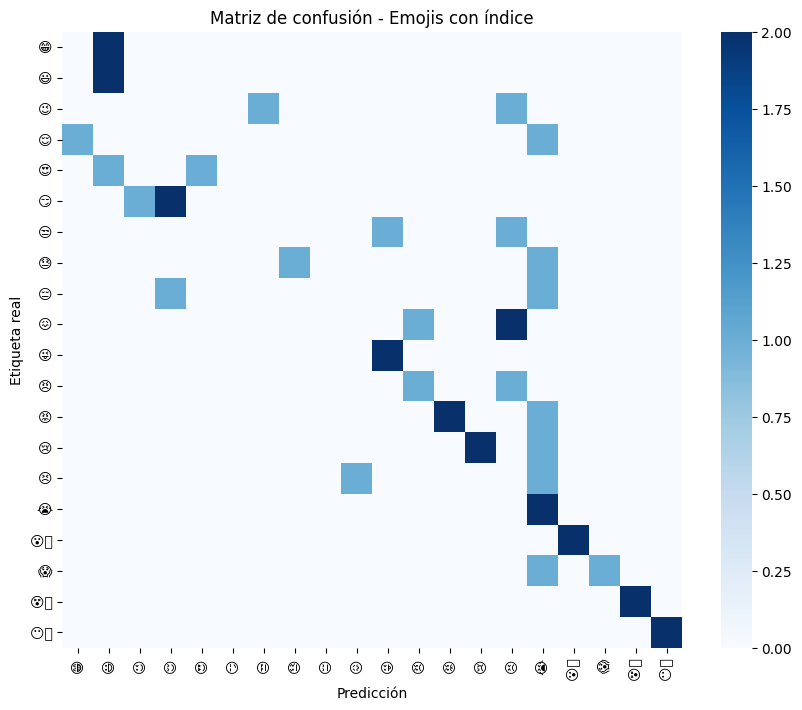

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_classes, y_pred_classes)

# Etiquetas combinadas
labels_combined = le.classes_

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, cmap='Blues',
            xticklabels=labels_combined,
            yticklabels=labels_combined)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de confusión - Emojis con índice")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

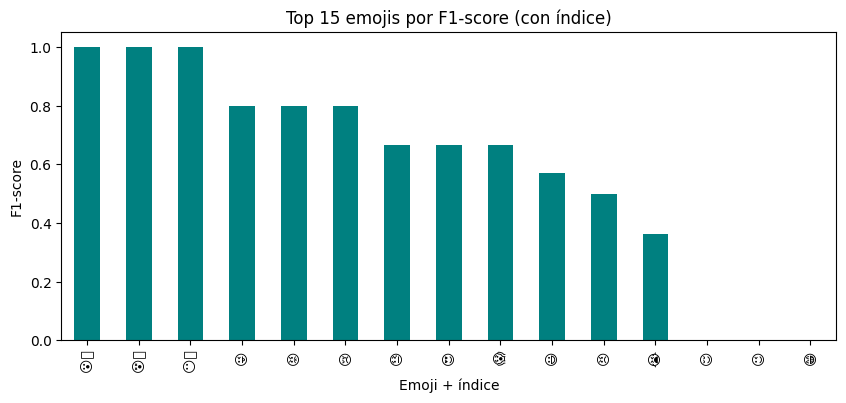

In [19]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_true_classes, y_pred_classes,
                               target_names=labels_combined, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report[:-3].sort_values(by='f1-score', ascending=False)['f1-score'].head(15).plot(
    kind='bar', color='teal', figsize=(10,4))
plt.title("Top 15 emojis por F1-score (con índice)")
plt.ylabel("F1-score")
plt.xlabel("Emoji + índice")
plt.show()


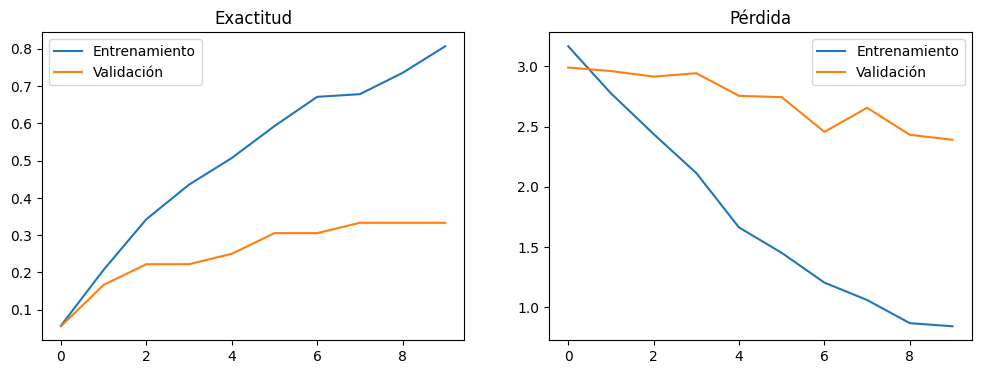

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

# Exactitud
axs[0].plot(history.history['accuracy'], label='Entrenamiento')
axs[0].plot(history.history['val_accuracy'], label='Validación')
axs[0].set_title('Exactitud')
axs[0].legend()

# Pérdida
axs[1].plot(history.history['loss'], label='Entrenamiento')
axs[1].plot(history.history['val_loss'], label='Validación')
axs[1].set_title('Pérdida')
axs[1].legend()

plt.show()


In [21]:
top_n = 3
top_n_correct = np.any(np.argsort(y_pred_probs, axis=1)[:, -top_n:] == y_true_classes[:, None], axis=1)
top_n_accuracy = np.mean(top_n_correct)
print(f"Top-{top_n} accuracy: {top_n_accuracy:.2f}")


Top-3 accuracy: 0.57


In [22]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

print(history.history.keys())

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7614 - loss: 0.9769 - val_accuracy: 0.4318 - val_loss: 2.1793
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7670 - loss: 0.9495 - val_accuracy: 0.4545 - val_loss: 2.0378
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7955 - loss: 0.7853 - val_accuracy: 0.5000 - val_loss: 2.0771
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8295 - loss: 0.6380 - val_accuracy: 0.4773 - val_loss: 2.1517
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8182 - loss: 0.6091 - val_accuracy: 0.4318 - val_loss: 2.2891
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8295 - loss: 0.5732 - val_accuracy: 0.4773 - val_loss: 2.2563
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8807 - loss: 0.4695 - val_accuracy: 0.4318 - val_loss: 2.3417
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8693 - loss: 0.5027 - val_accuracy: 0.4773 - val_loss: 2.2760


In [23]:
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f"Accuracy final entrenamiento: {train_acc:.2f}")
print(f"Accuracy final validación: {val_acc:.2f}")


Accuracy final entrenamiento: 0.86
Accuracy final validación: 0.50


In [24]:
# model.evaluate puede devolver loss + varios métricos.
results = model.evaluate(X_test, y_test)

# Desempaquetado seguro según cuántos valores devuelva
loss = results[0]
acc = results[1] if len(results) > 1 else None

# Mostrar resultados (maneja el caso de múltiples métricas)
if acc is not None:
	print(f"Accuracy total del modelo: {acc:.4f}")
else:
	print(f" Loss del modelo: {loss:.4f}")

if len(results) > 2:
	other_metrics = results[2:]
	print("Otros métricos:", [f"{m:.4f}" for m in other_metrics])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5000 - loss: 2.1936
Accuracy total del modelo: 0.5000


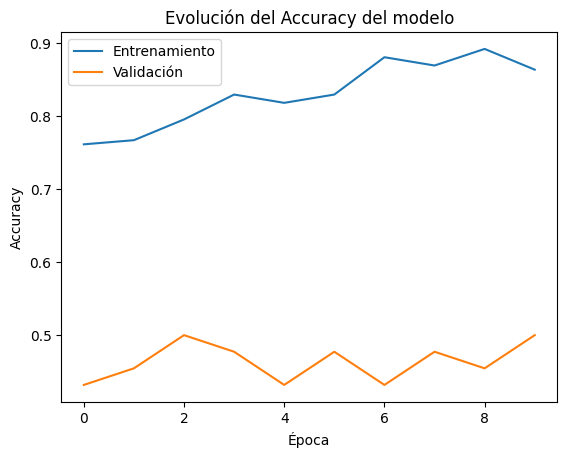

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title("Evolución del Accuracy del modelo")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# Entrenamiento con aumento de datos
history = model.fit(datagen.flow(X_train, y_train, batch_size=16),
                    epochs=20,
                    validation_data=(X_test, y_test))


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3750 - loss: 2.2885 - val_accuracy: 0.4318 - val_loss: 1.9881
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4091 - loss: 2.1617 - val_accuracy: 0.4773 - val_loss: 1.8785
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4318 - loss: 1.8752 - val_accuracy: 0.4545 - val_loss: 2.0565
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4261 - loss: 1.8367 - val_accuracy: 0.5000 - val_loss: 1.6569
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5170 - loss: 1.6696 - val_accuracy: 0.4773 - val_loss: 1.7306
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4830 - loss: 1.6558 - val_accuracy: 0.4773 - val_loss: 1.8405
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4943 - loss: 1.5984 - val_accuracy: 0.5455 - val_loss: 1.8091
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5398 - loss: 1.5494 - val_accuracy: 0.4773 - v

In [ ]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(len(np.unique(y_encoded)), activation='softmax')
])


c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model first
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(datagen.flow(X_train, y_train, batch_size=16),
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop])


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.0966 - loss: 5.7392 - val_accuracy: 0.0682 - val_loss: 3.0141
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1591 - loss: 3.5242 - val_accuracy: 0.0227 - val_loss: 2.9999
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3239 - loss: 2.8696 - val_accuracy: 0.0455 - val_loss: 3.1185
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3466 - loss: 2.1317 - val_accuracy: 0.0455 - val_loss: 4.0499
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3636 - loss: 2.1258 - val_accuracy: 0.0455 - val_loss: 6.0548
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4318 - loss: 2.0218 - val_accuracy: 0.0455 - val_loss: 8.5447


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64,64,3))
for layer in base.layers:
    layer.trainable = False  # congelar capas base

x = base.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(len(np.unique(y_encoded)), activation='softmax')(x)

model = Model(inputs=base.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\angel\AppData\Local\Temp\ipykernel_20788\3336631986.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64,64,3))


<Axes: >

c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 127787 (\N{FOG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128171 (\N{DIZZY SYMBOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127787 (\N{FOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) DejaVu Sans.
 

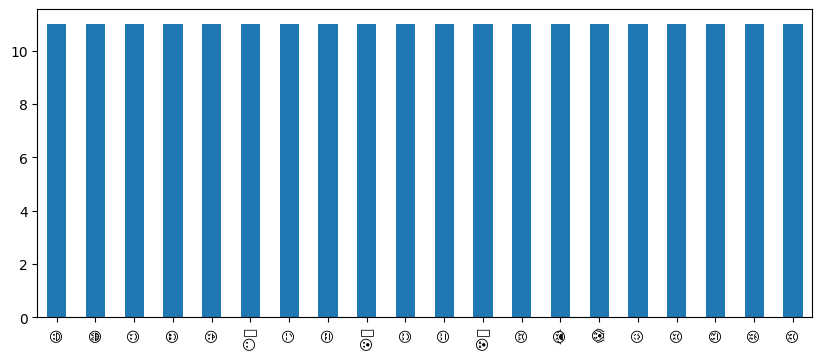

In [ ]:
pd.Series(y).value_counts().plot(kind='bar', figsize=(10,4))


In [ ]:
img = Image.open(img_path).convert('RGB').resize((96, 96))


c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
from tensorflow.keras.metrics import TopKCategoricalAccuracy

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy', TopKCategoricalAccuracy(k=3)])


In [ ]:
top_n = 5
top_n_correct = np.any(np.argsort(y_pred_probs, axis=1)[:, -top_n:] == y_true_classes[:, None], axis=1)
top_n_accuracy = np.mean(top_n_correct)
print(f"Top-{top_n} accuracy: {top_n_accuracy:.2f}")


Top-5 accuracy: 0.75


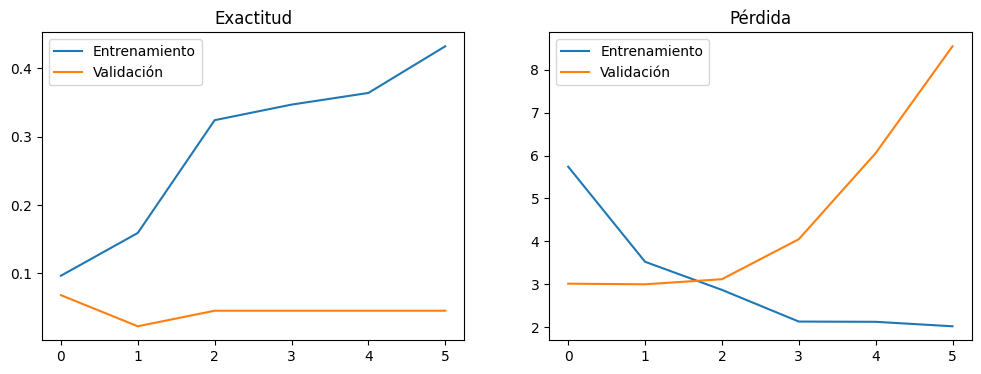

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

# Exactitud
axs[0].plot(history.history['accuracy'], label='Entrenamiento')
axs[0].plot(history.history['val_accuracy'], label='Validación')
axs[0].set_title('Exactitud')
axs[0].legend()

# Pérdida
axs[1].plot(history.history['loss'], label='Entrenamiento')
axs[1].plot(history.history['val_loss'], label='Validación')
axs[1].set_title('Pérdida')
axs[1].legend()

plt.show()


c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

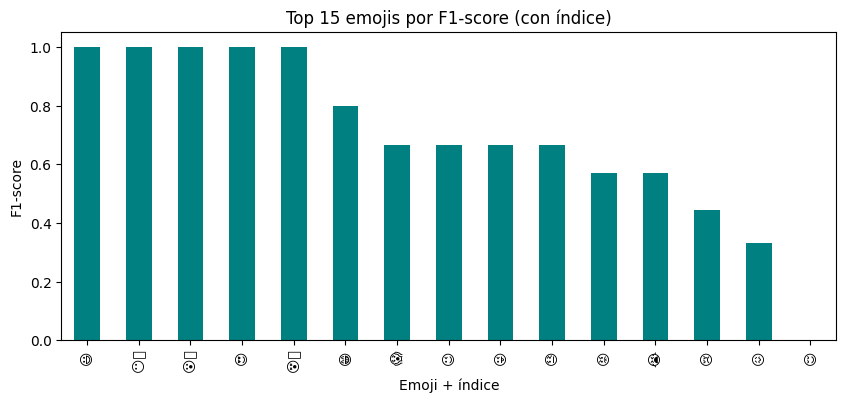

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_true_classes, y_pred_classes,
                               target_names=labels_combined, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report[:-3].sort_values(by='f1-score', ascending=False)['f1-score'].head(15).plot(
    kind='bar', color='teal', figsize=(10,4))
plt.title("Top 15 emojis por F1-score (con índice)")
plt.ylabel("F1-score")
plt.xlabel("Emoji + índice")
plt.show()


c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128171 (\N{DIZZY SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 127787 (\N{FOG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128171 (\N{DIZZY SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_fig

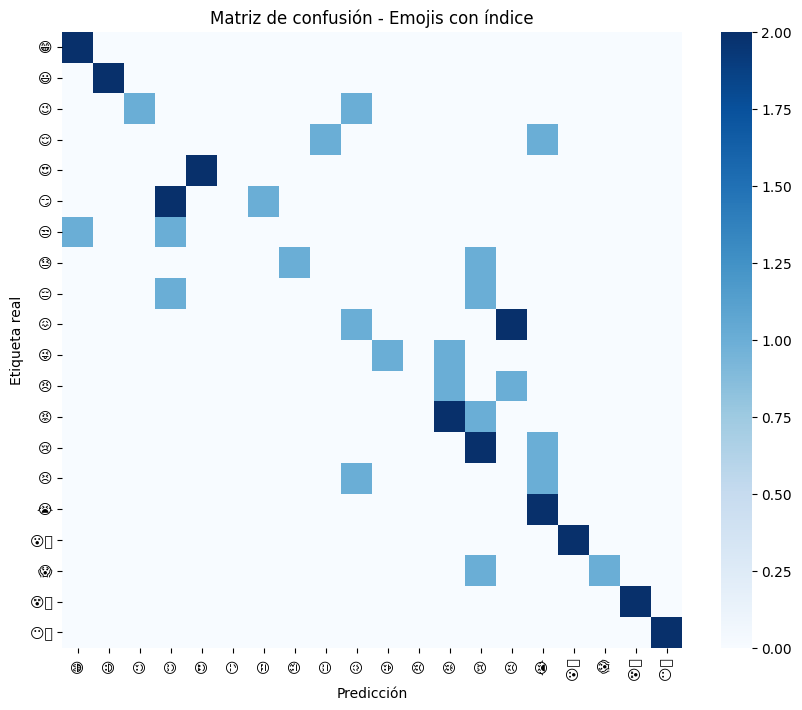

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_classes, y_pred_classes)

# Etiquetas combinadas
labels_combined = le.classes_

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, cmap='Blues',
            xticklabels=labels_combined,
            yticklabels=labels_combined)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de confusión - Emojis con índice")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
